In [ ]:
!nvidia-smi

Wed Nov 22 08:13:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 5.71 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.3 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 994.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#Stock Price Prediction using Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cudf
import cuml
import cupy as cp
import pandas as pd

In [ ]:
from cuml.model_selection import train_test_split
from cuml.linear_model import LinearRegression as cuLR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Reading Data using GPU

%%timeit
stock_news_GPU= cudf.read_csv("/content/drive/MyDrive/PROJECT/Combined_News_DJIA.csv")
stock_value_GPU = cudf.read_csv("/content/drive/MyDrive/PROJECT/upload_DJIA_table.csv")

57.3 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:

#Making DataFrame
df1 = cudf.read_csv("/content/drive/MyDrive/PROJECT/upload_DJIA_table.csv")
df1

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [ ]:

#splitting DataFrame for Analysis
x =df1[['Open','High','Low','Volume']].values
y =df1['Close'].values

In [ ]:

#Splitting into train and test values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=0)
x_train.shape

(1592, 4)

In [ ]:
#Making variable regressor
regressor = cuLR()

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


In [ ]:

#Training the Model
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:

#Printing the values of regression coefficients
print(regressor.coef_)

[-6.25689211e-01  8.71574072e-01  7.53498931e-01 -3.96191761e-08]


In [ ]:
#Printing the intercept value
print(regressor.intercept_)

11.971371716399517


In [ ]:
#Predicting on test data
predicted = regressor.predict(x_test)
print(predicted)

[12676.83534702 16496.49063951 10113.97748619 17832.75180355
 15113.08970128 15893.42453009 17069.89747397 17921.47487039
 12074.83673318 18121.39330333 11485.7608319  13142.86083699
  8024.69201181 16004.19712279 11127.37549856 17961.89561553
 17958.06802252 16237.10331256 17680.25388281 10876.19257526
 15546.37032859 17890.55284967  8459.83273505 18142.34829845
 17091.7471061  17386.12371319 13555.32331255 17409.07640763
 13174.65186677 16847.34410806  7843.37667124  9052.83878622
 16608.71197378 10588.23919329 13403.0567742  15605.5032569
 11681.15614091 12029.34802812  8511.14902482 11206.56659302
 18112.54031771 15055.43617702  8196.09702771 17718.88287442
 12171.40094899 17764.88481309 14660.67334218 12248.27669429
 11962.13537953 16352.83928451 16442.80361317 13005.44758986
 15389.76087211 15053.54096325 16632.93976419  9312.48331957
 16859.99448262 12632.43943787 10286.51589527  8148.81781874
 12429.73056223 13899.42137019 10587.46385612 12250.32140728
 11051.56358009 10253.027

In [ ]:
#Making DataFrame
dframe = cudf.DataFrame({'Actual' : y_test.flatten(),'Predicted': predicted.flatten()})

In [ ]:
dframe.head(50)

,Actual,Predicted
0,12681.160156,12676.835347
1,16469.990234,16496.490640
2,10024.019531,10113.977486
3,17817.900391,17832.751804
4,14995.230469,15113.089701
5,15914.620117,15893.424530
6,17055.419922,17069.897474
7,17919.289062,17921.474870
8,12043.559570,12074.836733
9,18105.169922,18121.393303


In [ ]:
#Printing Performance parameter r2
cu_r2 = cuml.metrics.r2_score(y_test,predicted)

In [ ]:
cu_r2

0.9997696551008888

#Sentiment Analysis using News Headlines by Random Forest classifier

In [ ]:
import cudf


In [ ]:
#Loading Dataset
df2= cudf.read_csv("/content/drive/MyDrive/PROJECT/Combined_News_DJIA.csv")
df2

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
#Splitting Dataset into train and test set
train = df2[df2['Date']<'20140601']
test = df2[df2['Date']>'20140531']

In [ ]:
# Removing punctuations
data=train.iloc[:,2:27]
for column in data.columns:
    data[column] = data[column].str.replace("[^a-zA-Z]", " ", regex=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

In [ ]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,b welcome to world war iv now in high definit...,b georgia s move a mistake of monumental prop...,...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...
2,b remember that adorable year old who sang a...,b russia ends georgia operation,b if we had no sexual harassment we would hav...,b al qa eda is losing support in iraq because ...,b ceasefire in georgia putin outmaneuvers the...,b why microsoft and intel tried to kill the xo...,b stratfor the russo georgian war and the bal...,b i m trying to get a sense of this whole geor...,b the us military was surprised by the timing ...,b u s beats war drum as iran dumps the dollar,...,b u s troops still in georgia did you know t...,b why russias response to georgia was right,b gorbachev accuses u s of making a serious ...,b russia georgia and nato cold war two,b remember that adorable year old who led y...,b war in georgia the israeli connection,b all signs point to the us encouraging georgi...,b christopher king argues that the us and nato...,b america the new mexico,b bbc news asia pacific extinction by man...
3,b u s refuses israel weapons to attack iran ...,b when the president ordered to attack tskhinv...,b israel clears troops who killed reuters cam...,b britain s policy of being tough on drugs is...,b body of year old found in trunk latest ...,b china has moved million quake survivors...,b bush announces operation get all up in russi...,b russian forces sink georgian ships,b the commander of a navy air reconnaissance s...,b of cnn readers russia s actions in geor...,...,b elephants extinct by,b us humanitarian missions soon in georgia i...,b georgia s ddos came from us sources,b russian convoy heads into georgia violating...,b israeli defence minister us against strike ...,b gorbachev we had no choice,b witness russian forces head towards tbilisi...,b quarter of russians blame u s for conflict...,b georgian president says us military will ta...,b nobel laureate aleksander solzhenitsyn...
4,b all the experts admit that we should legalis...,b war in south osetia pictures made by a ...,b swedish wrestler ara abrahamian throws away ...,b russia exaggerated the death toll in south o...,b missile that killed inside pakistan may ha...,b rushdie cond

In [ ]:
#converting array into string
row_values = data.iloc[1, 0:25]
row_values_str = row_values.astype('str')

# Use cuDF string concat method
result = row_values_str.str.cat(sep=' ')

print(result)

b why wont america and nato help us  if they wont help us now  why did we help them in iraq   b bush puts foot down on georgian conflict  b jewish georgian minister  thanks to israeli training  we re fending off russia   b georgian army flees in disarray as russians advance   gori abandoned to russia without a shot fired  b olympic opening ceremony fireworks  faked   b what were the mossad with fraudulent new zealand passports doing in iraq   b russia angered by israeli military sale to georgia  b an american citizen living in s ossetia blames u s  and georgian leaders for the genocide of innocent people  b welcome to world war iv  now in high definition   b georgia s move  a mistake of monumental proportions   b russia presses deeper into georgia  u s  says regime change is goal  b abhinav bindra wins first ever individual olympic gold medal for india  b  u s  ship heads for arctic to define territory  b drivers in a jerusalem taxi station threaten to quit rather than work for their n

In [ ]:
#Merging every Headlines into one
headlines = []

for row in range(len(data)):
# Assuming 'data'  cuDF DataFrame
  row_values = data.iloc[row, 0:25]

# Convert numeric values to strings using cudf Series
  row_values_str = row_values.astype('str')

# Use cuDF string concat method
  result = row_values_str.str.cat(sep=' ')

  headlines.append(result)

In [ ]:
#printing first Headlines
headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [ ]:
from cuml.ensemble import RandomForestClassifier
from cuml.feature_extraction.text import CountVectorizer
from cuml.metrics import accuracy_score

In [ ]:
from cuml.preprocessing import LabelEncoder

In [ ]:
data_cudf = cudf.DataFrame({'text': headlines})
data_cudf

,text
0,b georgia downs two russian warplanes as cou...
1,b why wont america and nato help us if they w...
2,b remember that adorable year old who sang a...
3,b u s refuses israel weapons to attack iran ...
4,b all the experts admit that we should legalis...
...,...
1606,death toll among qatars world cup workers...
1607,saudis are eagerly awaiting the approval of a ...
1608,solar power storage prices drop in germany...
1609,china businessman jailed for years for buyi...


In [ ]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train['Label'])
train_labels

0       0
1       1
2       0
3       0
4       1
       ..
1606    1
1607    1
1608    0
1609    0
1610    0
Length: 1611, dtype: uint8

In [ ]:
# Convert the list of strings to a cuDF DataFrame
data_cudf = cudf.DataFrame({'text': headlines})
# Create a GPU-accelerated CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(2, 2))
train_dataset = count_vectorizer.fit_transform(data_cudf['text'])

# 'train_dataset' now contains the GPU-accelerated CountVectorizer representation of your text data


In [ ]:
train_dataset

In [ ]:
y = cudf.DataFrame(train['Label'])

In [ ]:
train_labels

0       0
1       1
2       0
3       0
4       1
       ..
1606    1
1607    1
1608    0
1609    0
1610    0
Length: 1611, dtype: uint8

In [ ]:
train_dataset_cudf = cudf.DataFrame(train_dataset.todense())

In [ ]:
random_classifier = RandomForestClassifier(n_estimators=250,split_criterion='entropy')
random_classifier.fit(train_dataset_cudf, train_labels)

RandomForestClassifier()

In [ ]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27].to_pandas()))

test_series = cudf.Series(test_transform)
test_dataset = count_vectorizer.transform(test_series)

# Convert the sparse matrix to a dense cuDF DataFrame
test_dataset_cudf = cudf.DataFrame(test_dataset.todense())

# Make predictions using the trained RandomForestClassifier
test_predictions =random_classifier.predict(test_dataset_cudf)


In [ ]:
test_predictions

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
121    1.0
122    1.0
123    1.0
124    1.0
125    1.0
Length: 126, dtype: float32

In [ ]:
asarray_integers = test_predictions.astype(int)
asarray_integers

0      1
1      1
2      1
3      1
4      1
      ..
121    1
122    1
123    1
124    1
125    1
Length: 126, dtype: int64

In [ ]:
accuracy = accuracy_score(test_predictions, test['Label'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.5555555820465088


In [ ]:
from cuml.metrics import confusion_matrix

matrix=confusion_matrix(test['Label'],asarray_integers)
print(matrix)

[[ 0 56]
 [ 0 70]]


In [ ]:
 y = cudf.DataFrame([asarray_integers])
 y

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Assuming 'test_predictions' and 'true_labels' are cuDF Series
test_predictions_pd = test_predictions.to_pandas()
test_pd = test['Label'].to_pandas()

# Now, 'test_predictions_pd' and 'true_labels_pd' are Pandas Series
# If you want them as DataFrames:
test_predictions_df = pd.DataFrame({'Predictions': test_predictions_pd})
true_labels_df = pd.DataFrame({'True Labels': test_pd})

In [ ]:
# Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
matrix=confusion_matrix(test_pd,test_predictions_pd)
print(matrix)
score=accuracy_score(test_pd,test_predictions_pd)
print(score)
report=classification_report(test_pd,test_predictions_pd)
print(report)

[[ 0 56]
 [ 0 70]]
0.5555555555555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.56      1.00      0.71        70

    accuracy                           0.56       126
   macro avg       0.28      0.50      0.36       126
weighted avg       0.31      0.56      0.40       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Monte Carlo simulation

In [ ]:
#Making DataFrame
df = cudf.read_csv("/content/drive/MyDrive/PROJECT/upload_DJIA_table.csv")
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [ ]:
df1 = df.iloc[::-1].reset_index(drop=True)
df1

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [ ]:
df1['return'] = df1['Adj Close'].pct_change().fillna(0)
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close,return
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.000000
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.004093
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.011872
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.009406
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.007194


In [ ]:
import cupy as cp
import cudf
import cuml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Function to perform Monte Carlo simulation
def monte_carlo_simulation(start_price, days, mu, sigma):
    dt = 1  # time step
    prices = cp.zeros(days)
    prices[0] = start_price

    shock = cp.zeros(days)
    drift = cp.zeros(days)

    for day in range(1, days):
        shock[day] = cp.random.normal(loc=mu * dt, scale=sigma * cp.sqrt(dt))
        drift[day] = mu * dt
        prices[day] = prices[day - 1] * cp.exp(drift[day] + shock[day])

    return prices

In [ ]:
returns = df1['Close'].pct_change()

In [ ]:
returns

0               <NA>
1        0.004093062
2       -0.011871985
3        -0.00940606
4         0.00719414
            ...     
1984     -0.01497118
1985     0.015722094
1986     0.016367809
1987     0.013298378
1988      0.00108081
Name: Close, Length: 1989, dtype: float64

In [ ]:
mu = returns.mean()
sigma = returns.std()

In [ ]:
# Set initial parameters for the simulation
start_price = df1['Close'].iloc[-1]
days = 100  # simulate future prices for one year


In [ ]:
simulated_prices_cupy = monte_carlo_simulation(start_price, days, mu, sigma)


In [ ]:
# Convert CuPy array to cuDF Series for plotting
simulated_prices_cudf = cudf.Series(simulated_prices_cupy)

# Create a DataFrame with the simulated prices
simulated_df_cudf = cudf.DataFrame({'Simulated Prices': simulated_prices_cudf})


In [ ]:
simulated_df_cudf

,Simulated Prices
0,17949.369141
1,17553.288654
2,17502.706800
3,17379.665842
4,17555.763530
...,...
95,20030.445786
96,19854.723261
97,19699.087593
98,19563.158538


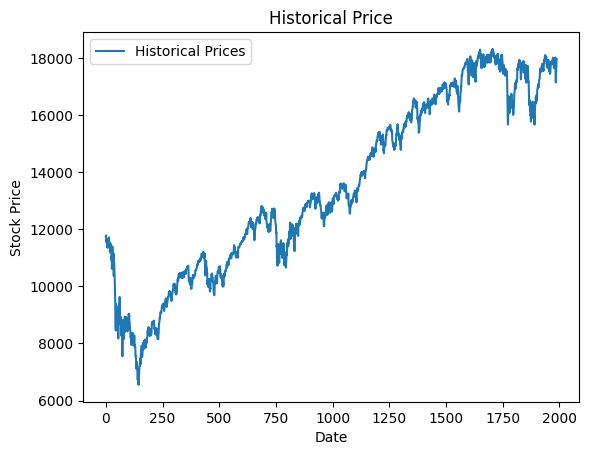

In [ ]:
plt.plot(df1.index.to_pandas(), df1['Close'], label='Historical Prices')
plt.title('Historical Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

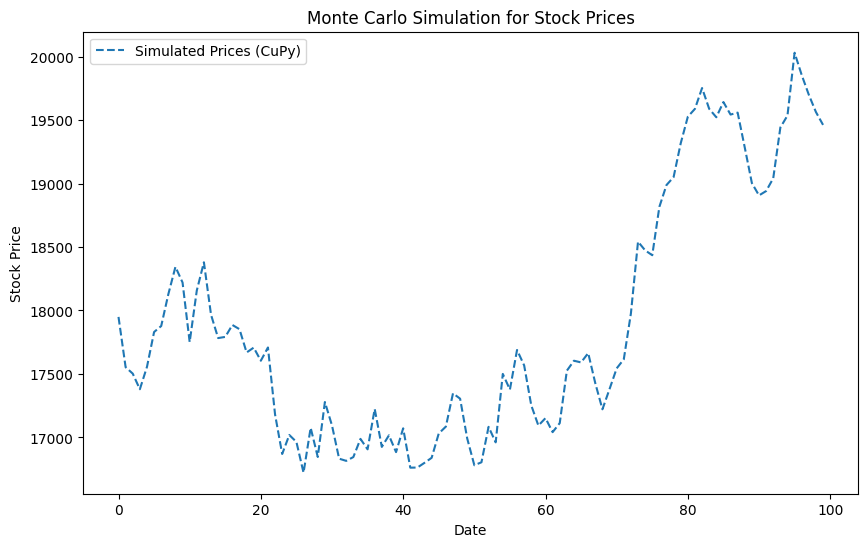

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(simulated_df_cudf.index.to_pandas(), simulated_df_cudf['Simulated Prices'], label='Simulated Prices (CuPy)', linestyle='dashed')
plt.title('Monte Carlo Simulation for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
initial = df['Adj Close'].iloc[0]
initial

17949.369141

In [ ]:
mu = returns.mean()
sigma = returns.std()

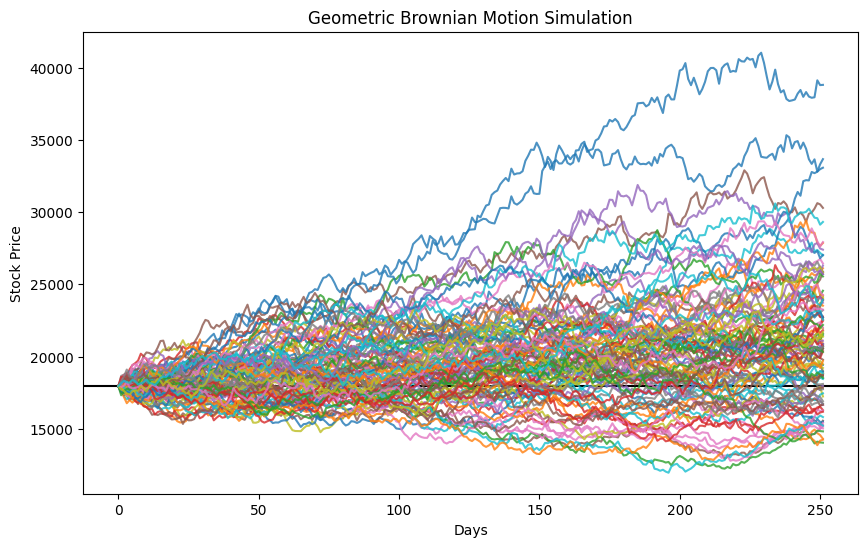

In [ ]:
import cupy as cp
import matplotlib.pyplot as plt

# Function to perform Geometric Brownian Motion simulation using CuPy
def geometric_brownian_motion(start_price, days, mu, sigma):
    dt = 1  # time step
    prices = cp.zeros(days)
    prices[0] = start_price

    for day in range(1, days):
        shock = cp.random.normal(loc=mu * dt, scale=sigma * cp.sqrt(dt))
        drift = mu * dt
        prices[day] = prices[day - 1] * cp.exp(drift + shock)

    return prices

# Set parameters
start_price = initial
days = 252  # trading days in a year
mu = returns.mean()  # expected return
sigma = returns.std()  # volatility
num_simulations = 100

simulated_prices = cp.zeros((num_simulations, days))

for i in range(num_simulations):
    simulated_prices[i, :] = geometric_brownian_motion(start_price, days, mu, sigma)

# Transfer data from GPU to CPU for plotting
simulated_prices_cpu = cp.asnumpy(simulated_prices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.axhline(initial, c= 'k')
plt.plot(simulated_prices_cpu.T, alpha=0.8)
plt.title('Geometric Brownian Motion Simulation')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()